# Decision Tree

# Fraud_check dataset

In [59]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [60]:
# Load Fraud_check dataset
fraud = pd.read_csv('/Users/Admin/Documents/data science assignment/Desicion Tree/Fraud_check.csv')

In [61]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data Processing

In [62]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [63]:
fraud.shape

(600, 6)

In [64]:
fraud1=pd.DataFrame(fraud)
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [65]:
df=fraud1[['Taxable.Income','Undergrad','Marital.Status','Work.Experience','Urban']]
df

,Taxable.Income,Undergrad,Marital.Status,Work.Experience,Urban
0,68833,NO,Single,10,YES
1,33700,YES,Divorced,18,YES
2,36925,NO,Married,30,YES
3,50190,YES,Single,15,YES
4,81002,NO,Married,28,NO
...,...,...,...,...,...
595,76340,YES,Divorced,7,YES
596,69967,YES,Divorced,2,YES
597,47334,NO,Divorced,0,YES
598,98592,YES,Married,17,NO


In [66]:
df['Taxable.Income'].max()

99619

In [67]:
df['Tax_New']=pd.cut(df['Taxable.Income'],bins=[0,30000,99619+1],labels=['Risky','Good'])
df1=df.drop(['Taxable.Income'],axis=1)
df1

,Undergrad,Marital.Status,Work.Experience,Urban,Tax_New
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [68]:
df2 = pd.get_dummies(df1)
df2

,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_New_Risky,Tax_New_Good
0,10,1,0,0,0,1,0,1,0,1
1,18,0,1,1,0,0,0,1,0,1
2,30,1,0,0,1,0,0,1,0,1
3,15,0,1,0,0,1,0,1,0,1
4,28,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
595,7,0,1,1,0,0,0,1,0,1
596,2,0,1,1,0,0,0,1,0,1
597,0,1,0,1,0,0,0,1,0,1
598,17,0,1,0,1,0,1,0,0,1


In [69]:
df3=df2.drop(['Tax_New_Risky'],axis=1)
df3

,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Tax_New_Good
0,10,1,0,0,0,1,0,1,1
1,18,0,1,1,0,0,0,1,1
2,30,1,0,0,1,0,0,1,1
3,15,0,1,0,0,1,0,1,1
4,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
595,7,0,1,1,0,0,0,1,1
596,2,0,1,1,0,0,0,1,1
597,0,1,0,1,0,0,0,1,1
598,17,0,1,0,1,0,1,0,1


In [70]:
X=df3.drop(['Tax_New_Good'],axis=1)
y=df3['Tax_New_Good']

In [71]:
X

,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,10,1,0,0,0,1,0,1
1,18,0,1,1,0,0,0,1
2,30,1,0,0,1,0,0,1
3,15,0,1,0,0,1,0,1
4,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
595,7,0,1,1,0,0,0,1
596,2,0,1,1,0,0,0,1
597,0,1,0,1,0,0,0,1
598,17,0,1,0,1,0,1,0


In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Tax_New_Good, Length: 600, dtype: uint8

In [73]:
X.shape

(600, 8)

In [74]:
y.shape

(600,)

In [75]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Building decision tree model using Entropy

In [76]:
# using entropy criteria

model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

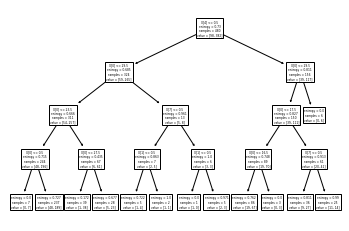

In [77]:
tree.plot_tree(model);

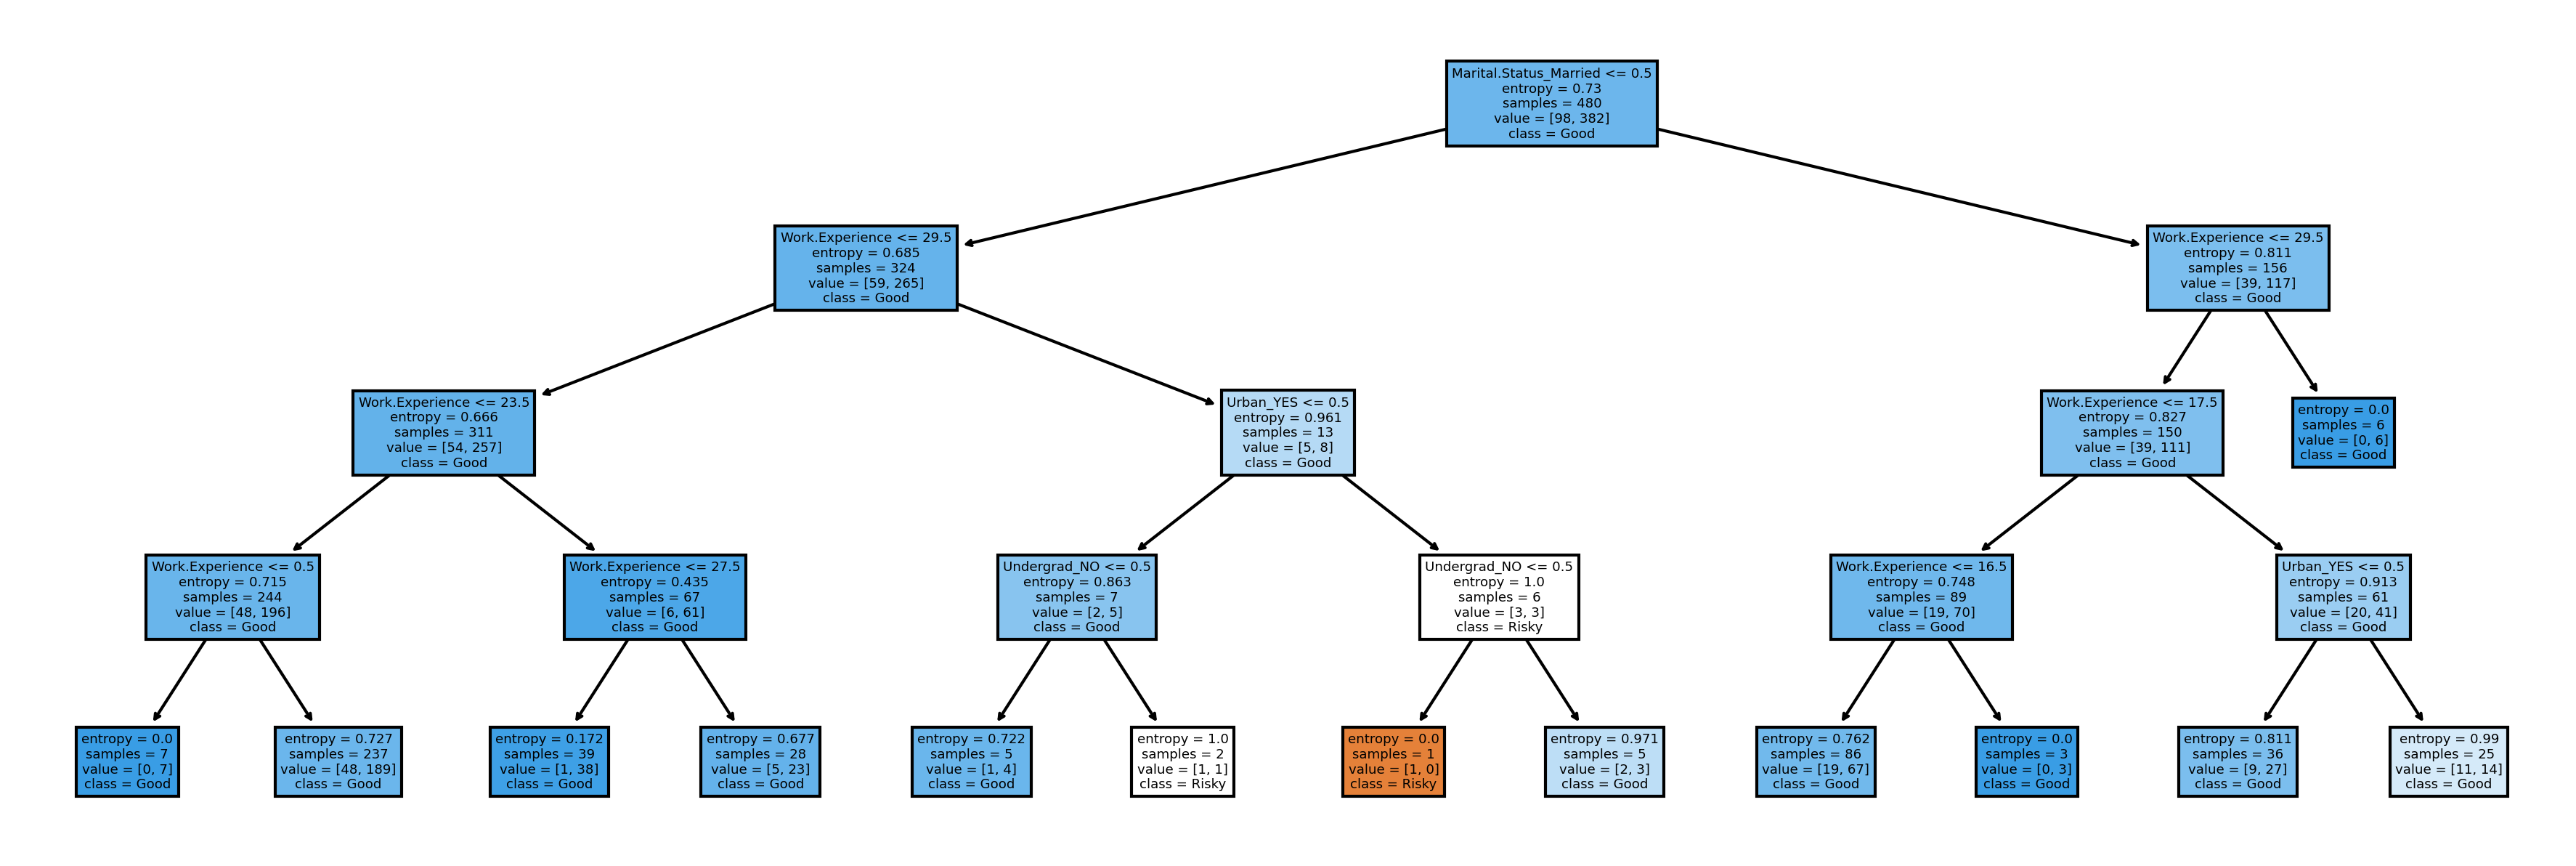

In [78]:
fn=['Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [79]:
model.feature_importances_ 

array([0.74049206, 0.06978666, 0.        , 0.        , 0.09304262,
       0.        , 0.        , 0.09667867])

In [80]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Work.Experience            0.740492
Urban_YES                  0.096679
Marital.Status_Married     0.093043
Undergrad_NO               0.069787
Urban_NO                   0.000000
Marital.Status_Single      0.000000
Marital.Status_Divorced    0.000000
Undergrad_YES              0.000000
dtype: float64

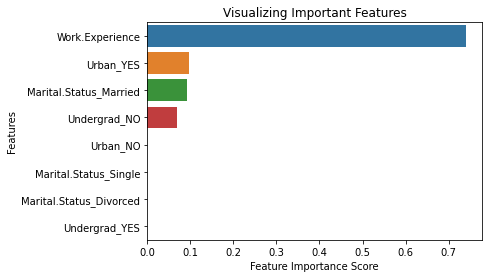

In [83]:
get_ipython().run_line_magic('matplotlib', 'inline')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [84]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1    117
0      3
dtype: int64

In [85]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [86]:
pd.crosstab(y_test,preds)  

col_0,0,1
Tax_New_Good,,
0,1,25
1,2,92


In [87]:
np.mean(preds==y_test)

0.775

#### Accuracy of the Decesion tree Model for fraud dataset  using Entropy is 77.5%.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [88]:
# Using gini criteria

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [89]:
model_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [90]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==y_test) 

0.775

#### Accuracy of the Decesion tree Model for fraud dataset using gini is 77.5%.